In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import networkx as nx
import os
import sys
sys.path.append('..')
from py_files.michele_algo import *

# Import Data

In [2]:
def inspect_network(folder):
    print(folder)
    creation_date = str(folder.split('/')[-3])
    df = pd.DataFrame(columns = ['name', 'scrape_date', '#nodes', '#edges', 'average_shortest_path_length', 'Generalized_euclidean', 'Our_polarity_score'])
    for file in os.listdir(folder):
        graph = nx.read_gexf(folder+file)
        graph = nx.to_undirected(graph)
        S = [graph.subgraph(c).copy() for c in sorted(nx.connected_components(graph), key=len, reverse=True)]
        graph = S[0]
        name = file[:-5]

        attr_dict = {
            'name' : name,
            'scrape_date' : creation_date, 
            '#nodes' : len(graph.nodes()),
            '#edges' : len(graph.edges()),
            'average_shortest_path_length' : nx.average_shortest_path_length(graph),
            'Generalized_euclidean' : do_ge(graph),
            'Our_polarity_score' : driver_g(graph) 
        }
        df = df.append(attr_dict, ignore_index = True)
    return df

In [3]:
main_dir = '../data/date_folders/'
First = True
for folder in os.listdir(main_dir):
    print(main_dir+folder+'/graphs/')
    if First:
        df = inspect_network(main_dir+folder+'/graphs/')
        First = False
    else:
        try:
            df = inspect_network(main_dir+folder+'/graphs/').append(df)
        except:
            pass

../data/date_folders/april_2/graphs/
../data/date_folders/april_2/graphs/


/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

../data/date_folders/.DS_Store/graphs/
../data/date_folders/.DS_Store/graphs/
../data/date_folders/april_4/graphs/
../data/date_folders/april_4/graphs/
../data/date_folders/may_7/graphs/
../data/date_folders/may_7/graphs/


/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/2197783465.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = inspect_network(main_dir+folder+'/graphs/').append(df)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/2197783465.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

../data/date_folders/feb_28/graphs/
../data/date_folders/feb_28/graphs/
../data/date_folders/april_17/graphs/
../data/date_folders/april_17/graphs/
../data/date_folders/march_19/graphs/
../data/date_folders/march_19/graphs/
../data/date_folders/april_29/graphs/
../data/date_folders/april_29/graphs/
../data/date_folders/april_18/graphs/
../data/date_folders/april_18/graphs/


/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/2197783465.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = inspect_network(main_dir+folder+'/graphs/').append(df)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/2197783465.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

../data/date_folders/april_25/graphs/
../data/date_folders/april_25/graphs/
../data/date_folders/march_23/graphs/
../data/date_folders/march_23/graphs/


/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/2197783465.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = inspect_network(main_dir+folder+'/graphs/').append(df)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

../data/date_folders/april_24/graphs/
../data/date_folders/april_24/graphs/


/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/2197783465.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = inspect_network(main_dir+folder+'/graphs/').append(df)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)


../data/date_folders/april_23/graphs/
../data/date_folders/april_23/graphs/


/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_15406/1635624543.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

In [4]:
#df = df.set_index('name')

In [5]:
df

,name,scrape_date,#nodes,#edges,average_shortest_path_length,Generalized_euclidean,Our_polarity_score
0,PoliticalDiscussion,april_23,55,95,2.744781,22.785946,-0.042481
1,ukpolitics,april_23,303,1261,2.033047,39.539015,-0.008701
2,democrats,april_23,113,441,2.431416,38.203162,0.06378
3,worldnews,april_23,143,206,3.640599,48.764655,0.092681
4,Republican,april_23,52,116,2.643288,24.030078,0.035106
0,communism,april_24,63,91,2.183308,29.431306,0.344089
1,News,april_24,264,463,3.657363,56.999132,-0.141636
0,politics,march_23,326,874,3.287192,44.463131,-0.031926
1,gaming,march_23,140,169,4.16629,57.137166,0.117404
0,FIFA,april_18,523,2123,3.002798,61.535633,-0.011387


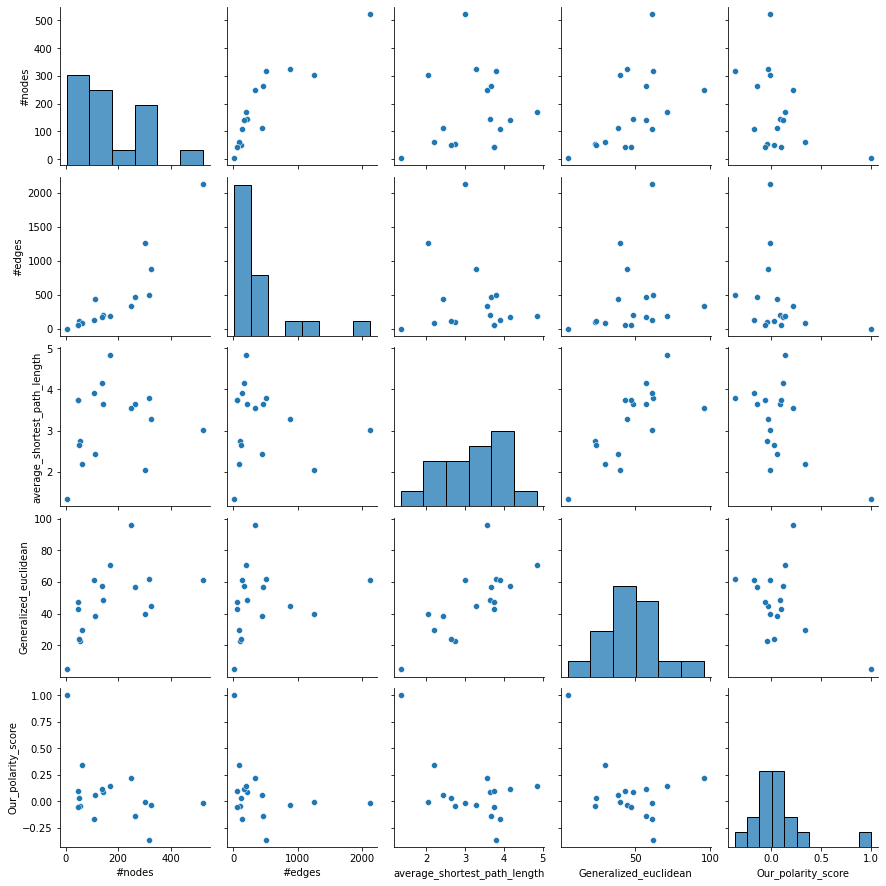

In [6]:
sns.pairplot(df, 
             #hue='name'
             )

# Barplots of main measures

In [7]:
# general seaborn settings
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

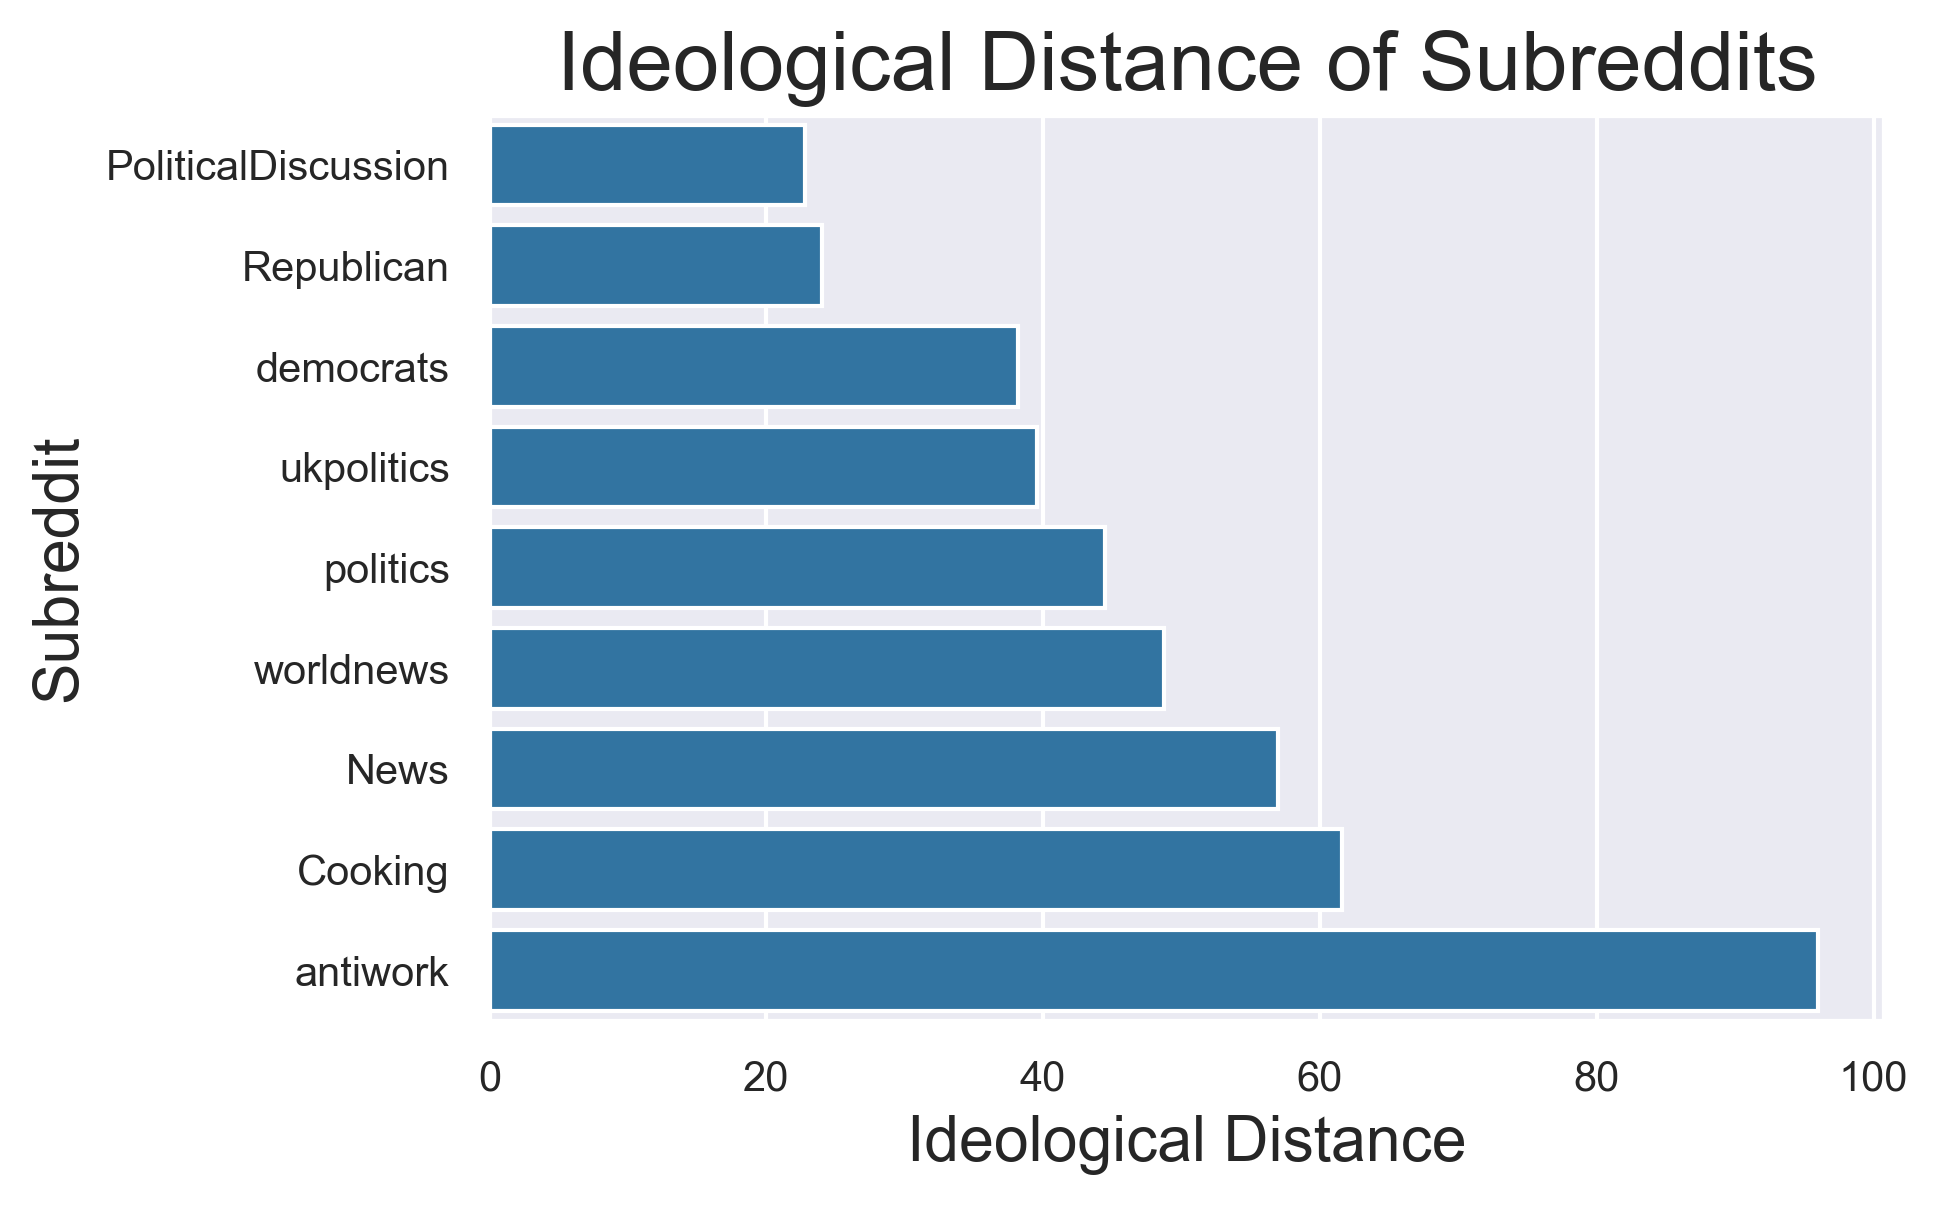

In [8]:
# generalized euclidean (michele measure 1)
df_GE = df.copy().sort_values('Generalized_euclidean')
df_GE = df_GE[df_GE['name'].isin([
    'PoliticalDiscussion',
    'Republican',
    'Cooking',
    'democrats',
    'ukpolitics',
    'politics',
    'worldnews',
    'News',
    'antiwork'
])]
bar_GE = sns.barplot(y=df_GE['name'], x=df_GE['Generalized_euclidean'], color='tab:blue')
bar_GE.axes.set_title('Ideological Distance of Subreddits',fontsize=20)
bar_GE.set_xlabel('Ideological Distance',fontsize=15)
bar_GE.set_ylabel('Subreddit',fontsize=15)
bar_GE.tick_params(labelsize=10)
fig = bar_GE.get_figure()
fig.savefig('../data/plots/bar_GE.png', bbox_inches='tight')

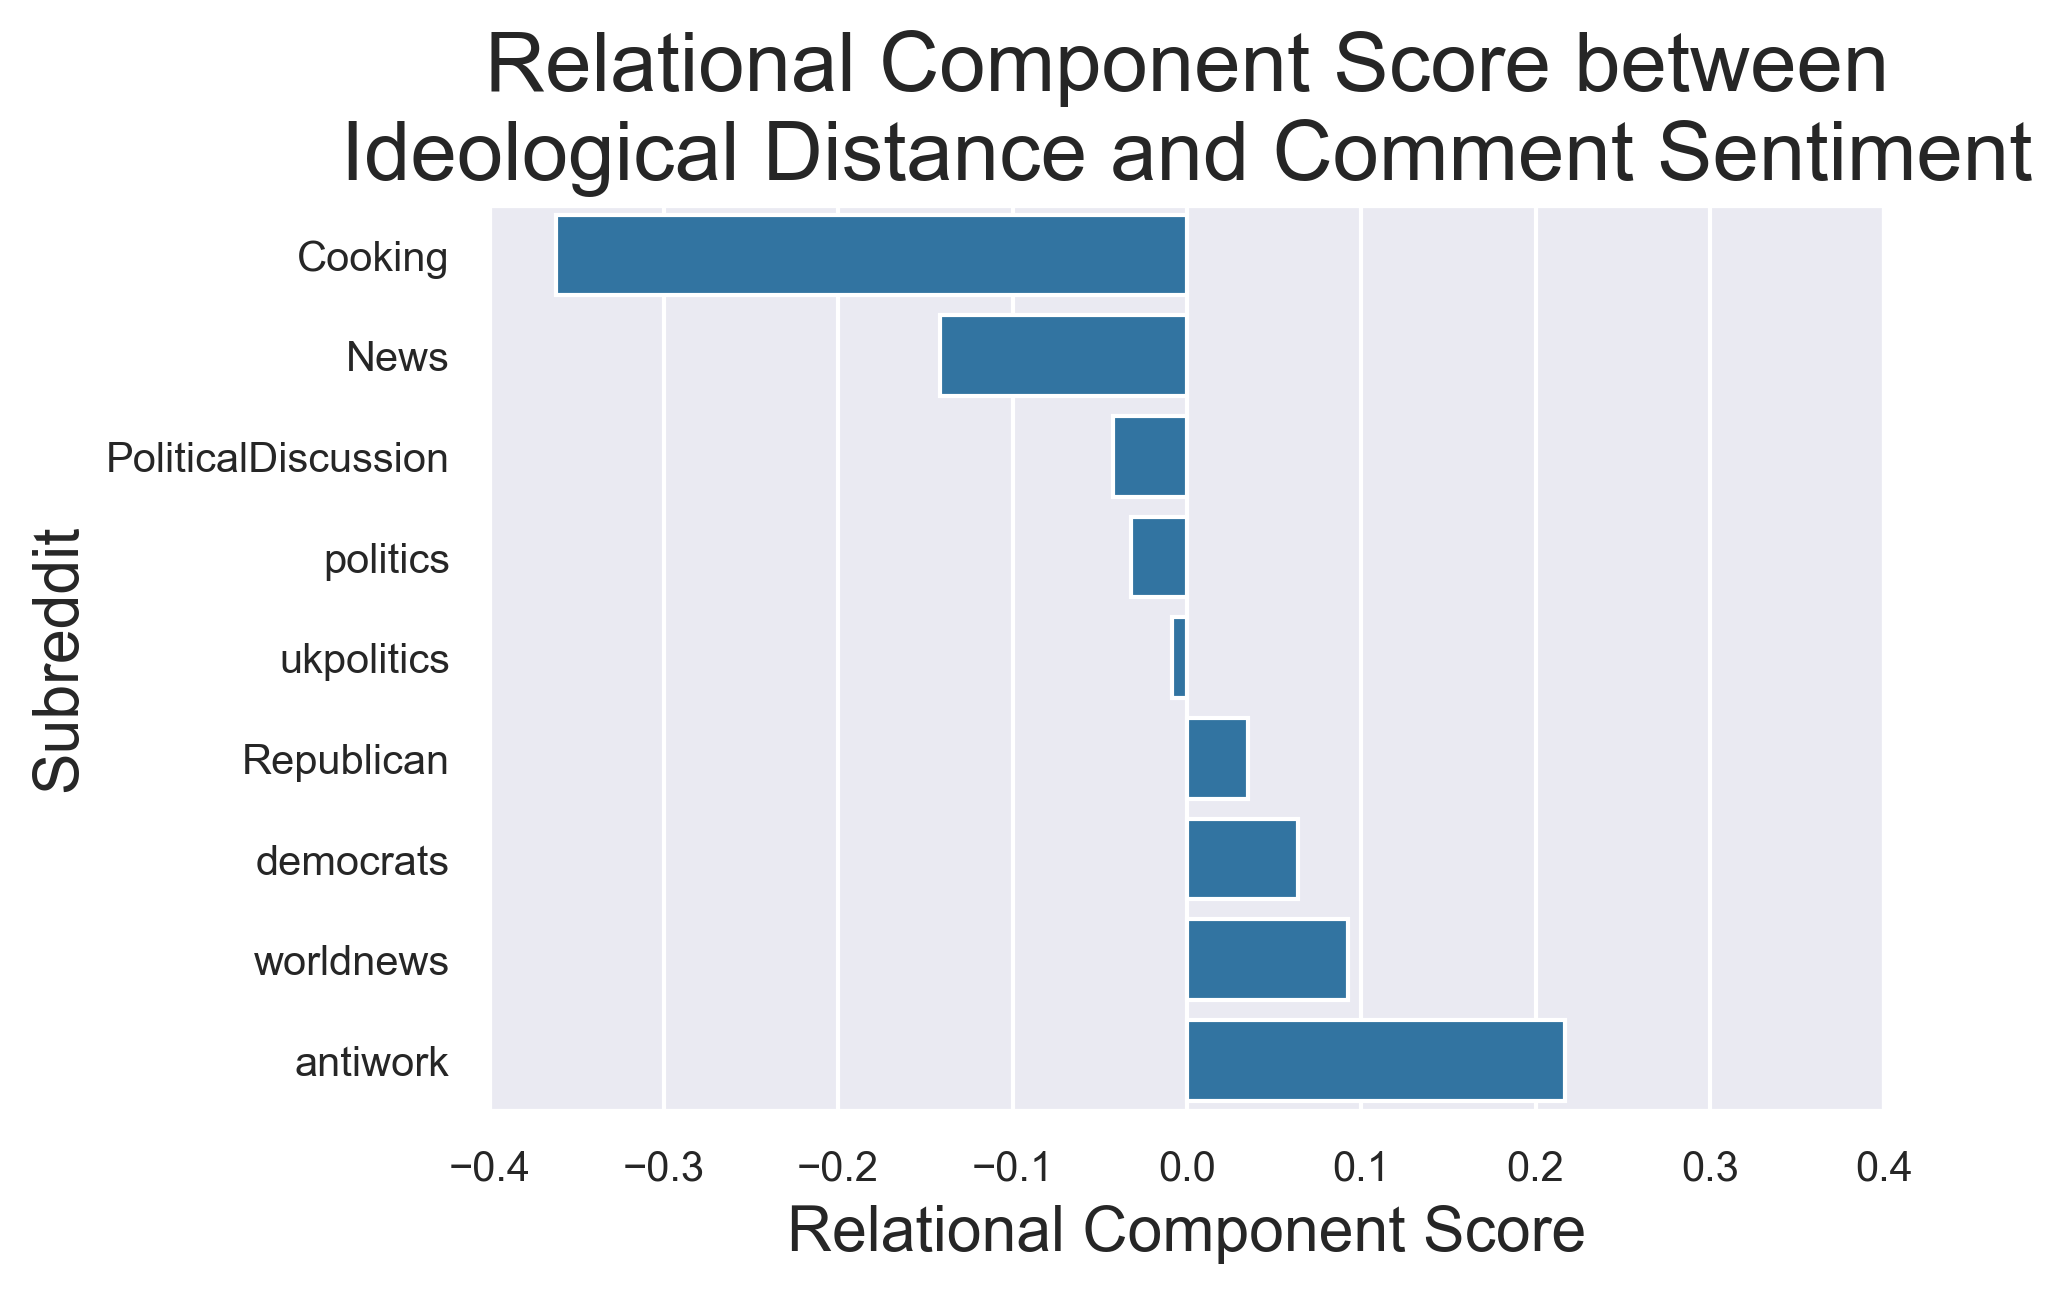

In [9]:
# Correlation between ideological distance and comment sentiment
df_correlation = df_GE.copy().sort_values('Our_polarity_score')
bar_correlation = sns.barplot(x=df_correlation['Our_polarity_score'], y=df_correlation['name'], color='tab:blue')
bar_correlation.set(xlim=(-0.4,0.4))
bar_correlation.axes.set_title('Relational Component Score between\nIdeological Distance and Comment Sentiment',fontsize=20)
bar_correlation.set_xlabel('Relational Component Score',fontsize=15)
bar_correlation.set_ylabel('Subreddit',fontsize=15)
bar_correlation.tick_params(labelsize=10)
fig = bar_correlation.get_figure()
fig.savefig('../data/plots/bar_correlation.png', bbox_inches='tight')

### New plot

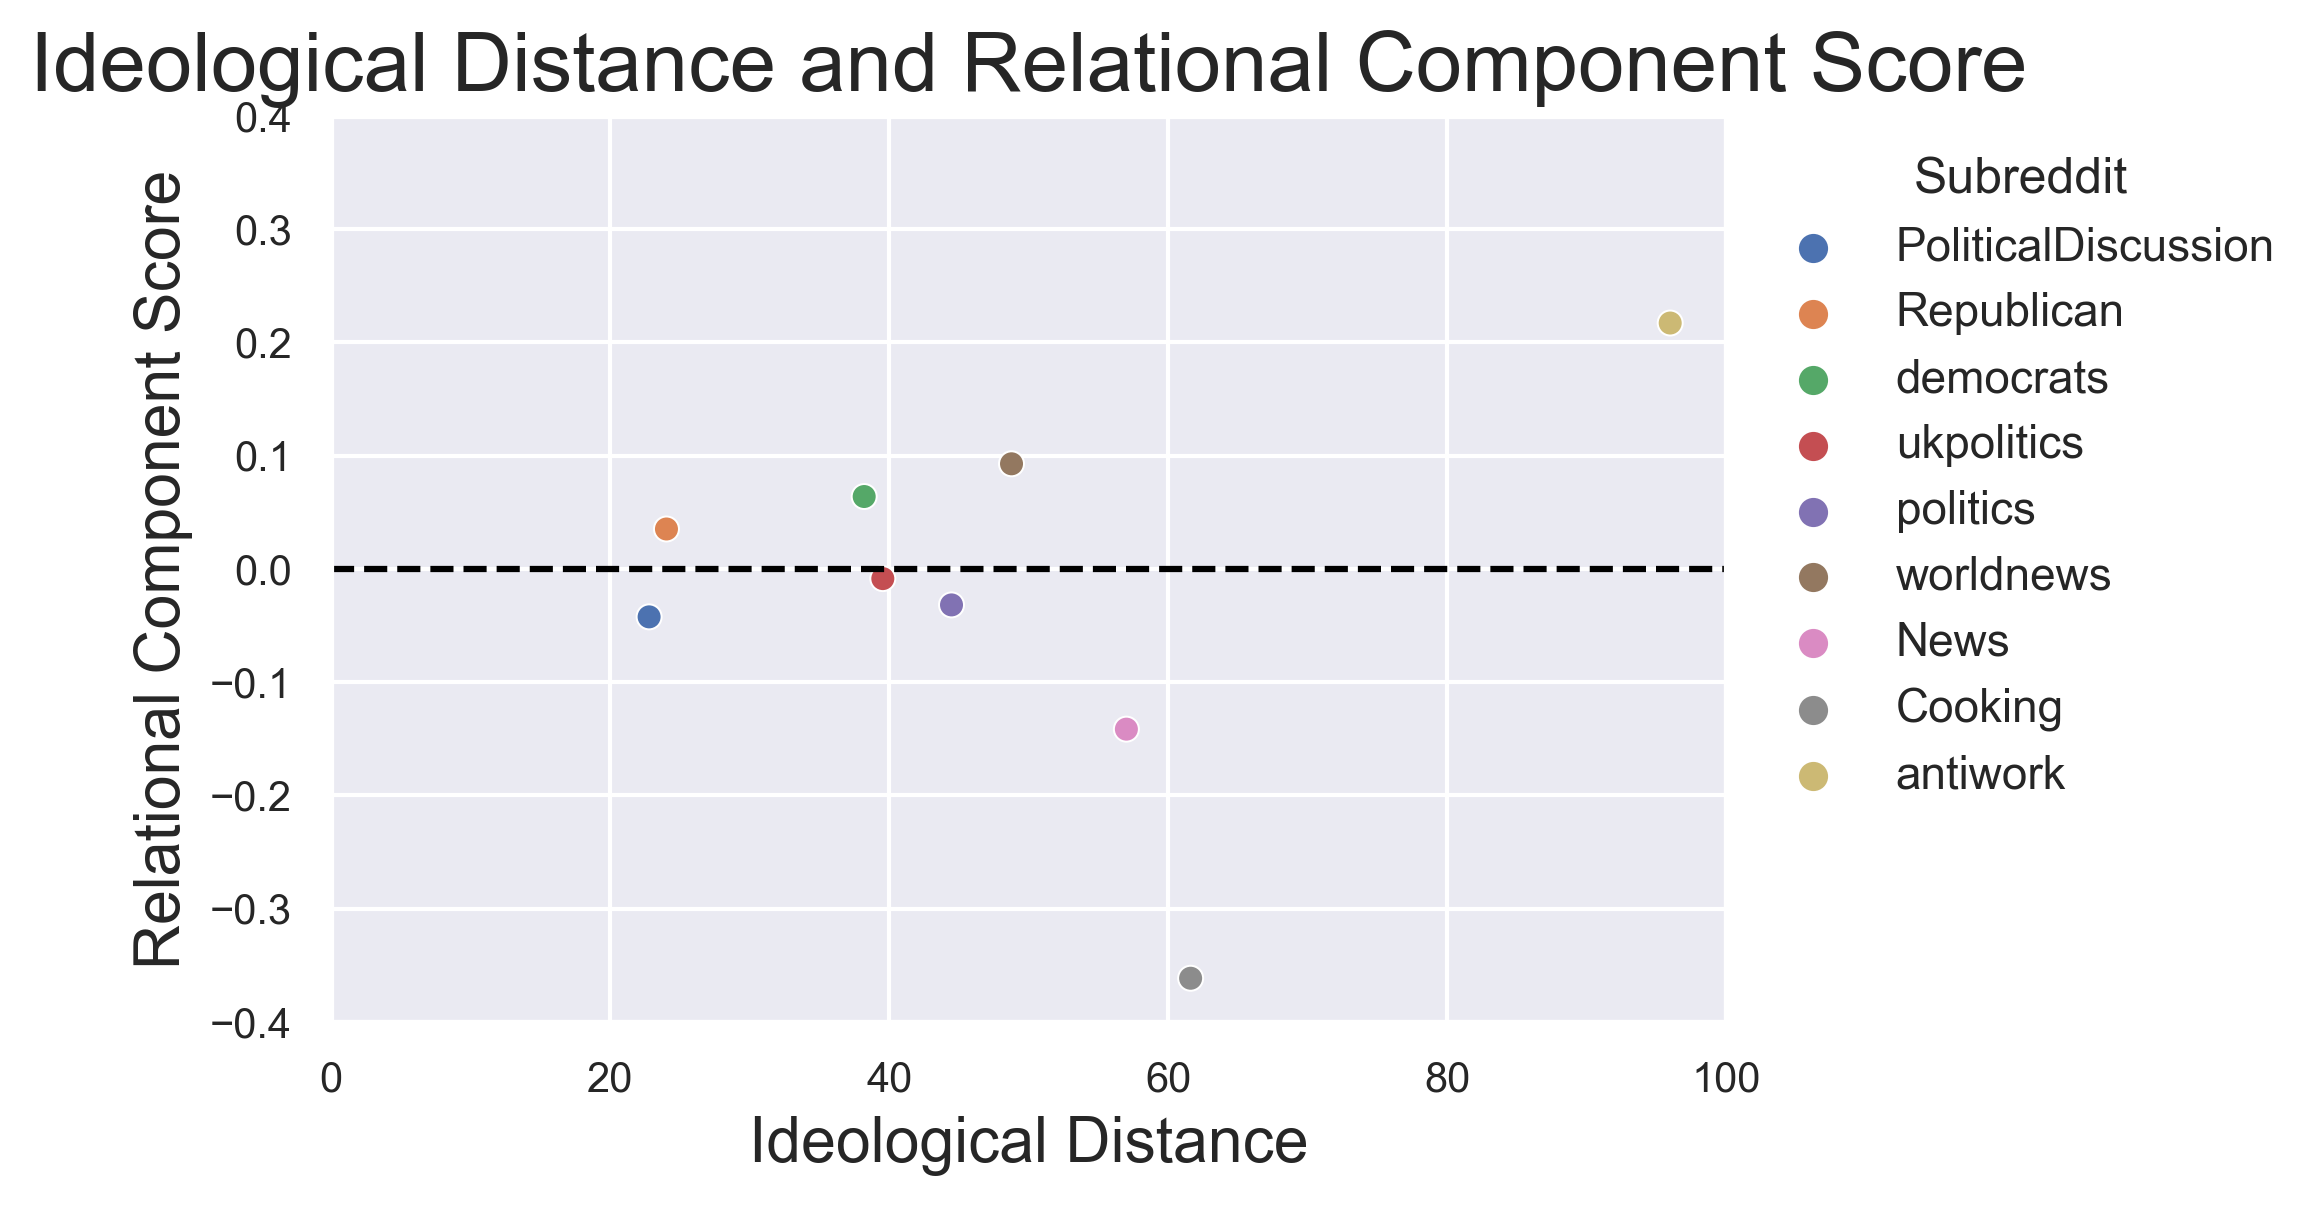

In [10]:
df_GE.rename(columns={'name':'Subreddit'}, inplace = True)
scatter = sns.scatterplot(data=df_GE, x='Generalized_euclidean', y='Our_polarity_score', hue='Subreddit')
plt.axhline(y=0, color='black', ls='dashed')
sns.move_legend(scatter, 'upper left', bbox_to_anchor=(1, 1), frameon=False)
# plt.axvline(x=60, color='black', ls='dashed')
scatter.set(xlim=(0,100), ylim=(-0.4,0.4))
scatter.axes.set_title('Ideological Distance and Relational Component Score',fontsize=20)
scatter.set_xlabel('Ideological Distance',fontsize=15)
scatter.set_ylabel('Relational Component Score',fontsize=15)
scatter.tick_params(labelsize=10)
fig = scatter.get_figure()
fig.savefig('../data/plots/scatter.png', bbox_inches='tight')

In [12]:
G = nx.read_gexf('../data/date_folders/april_17/graphs/antiwork.gexf')

In [29]:
df = pd.DataFrame()
df['edge'] = G.edges()
df['sentiment'] = nx.get_edge_attributes(G, 'sentiment').values()
df = df.reset_index().drop(columns=['level_0', 'level_1'])

In [30]:
nx.get_edge_attributes(G, 'sentiment')

{('Monsur_Ausuhnom', 'orthogonal-vector'): 0.0,
 ('Spacemage', 'cupofteaf'): 0.0,
 ('Spacemage', 'Monsur_Ausuhnom'): -0.7269,
 ('Zach2741', 'CurlzerUK'): 0.0,
 ('Zach2741', 'Orsted98'): -0.34,
 ('Anovale', 'El_Catalan99'): 0.0,
 ('Anovale', 'ComradeFish85'): 0.6249,
 ('Anovale', 'leedade'): 0.8271,
 ('Anovale', 'Existentialidiot83'): -0.5023,
 ('Keyblad3master', 'Monsur_Ausuhnom'): -0.5994,
 ('Keyblad3master', 'AutoModerator'): 0.0,
 ('InterstellarHayden', 'GorgeousAttacker'): 0.296,
 ('InterstellarHayden', 'lostdawnking'): -0.0547,
 ('InterstellarHayden', 'Keyblad3master'): 0.0129,
 ('InterstellarHayden', 'mawkdugless'): -0.0875,
 ('InterstellarHayden', 'fortifier22'): 0.0,
 ('InterstellarHayden', 'PresidentAshenHeart'): 0.875,
 ('MehNick80', 'Existentialidiot83'): -0.4215,
 ('MrBeansnose', 'Keyblad3master'): -0.5267,
 ('MrBeansnose', 'CrazyGrapefruit3204'): -0.1842,
 ('MrBeansnose', 'DrachCiv'): -0.2023,
 ('MrBeansnose', 'RamboNation'): 0.4692,
 ('MrBeansnose', 'Watermellon-Socks'): 

In [31]:
df

,edge,sentiment
0,"(Monsur_Ausuhnom, orthogonal-vector)",0.0000
1,"(Spacemage, cupofteaf)",0.0000
2,"(Spacemage, Monsur_Ausuhnom)",-0.7269
3,"(Zach2741, CurlzerUK)",0.0000
4,"(Zach2741, Orsted98)",-0.3400
...,...,...
337,"(crawling-alreadygirl, d2lover)",0.6486
338,"(Substantial_Toe_8409, Advanced_Research817)",0.0000
339,"(Substantial_Toe_8409, Deviousmist)",-0.3875
340,"(DreamEater2261, Jenraya)",0.2382


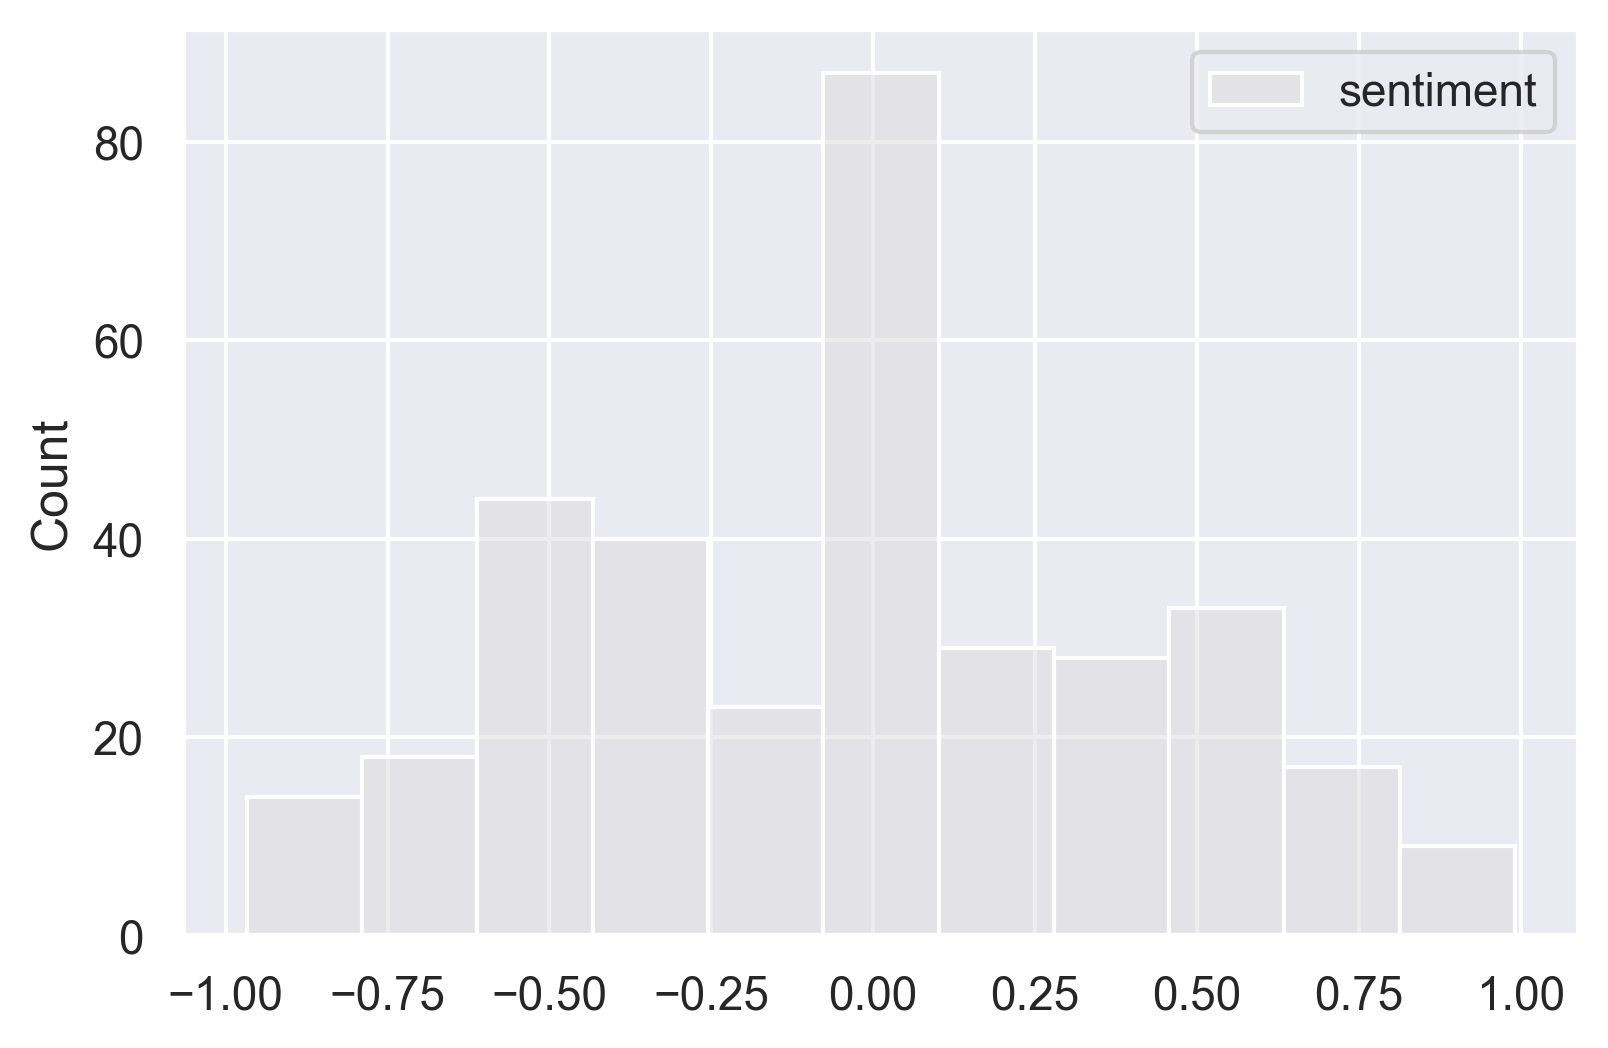

In [43]:
abab = sns.histplot(data=df, 
             palette='coolwarm', 
             cbar = True)

In [39]:
import pylab as pl

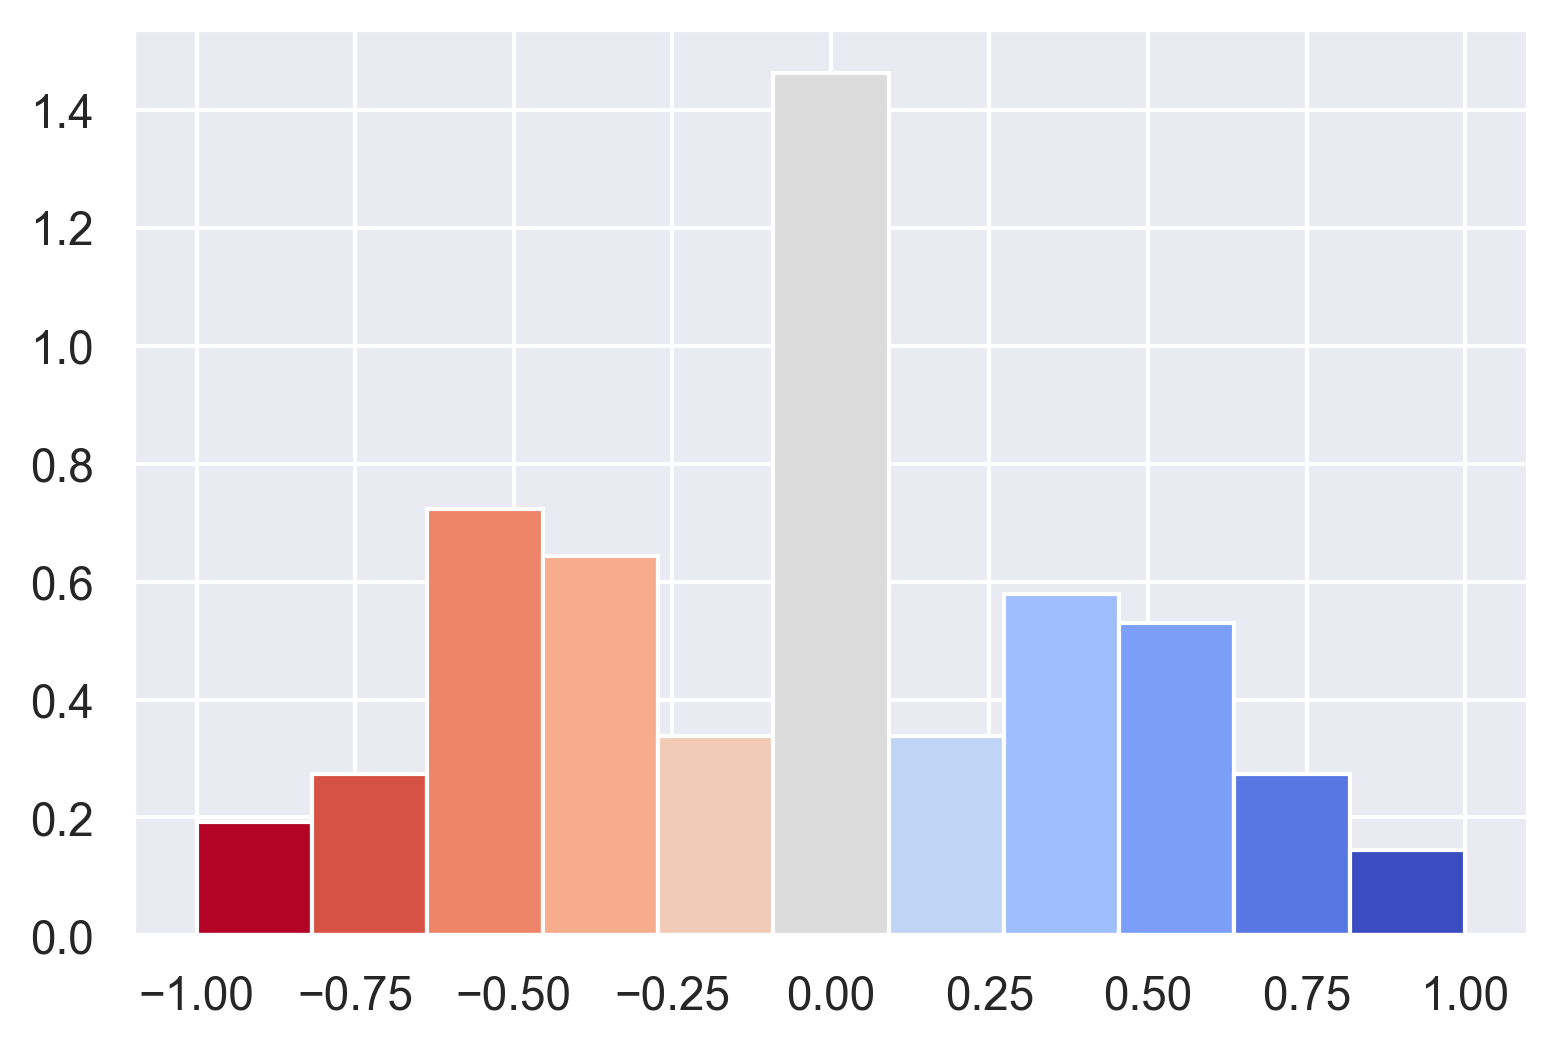

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Random gaussian data.
data = df['sentiment']

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('coolwarm_r')

# Plot histogram.
n, bins, patches = plt.hist(data, 11, density=True, range = (-1,1))
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.show()